# Выявление закономерностей успеха видеоигр.

# 1. Описание проекта
Вы работаете в интернет-магазине `«Стримчик»`, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone»:
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults"):
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное 
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории:
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году:
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант


# 2. Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
try:
    data = pd.read_csv(r'datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- `Year_of_Release` не бывает 2022 с половиной года. Тут нужен тип `int`.
- `User_Score` как сравнивать в строковом формате, сюда бы тип `float`.

In [5]:
((data.isna().mean()*100).reset_index()).merge((data.isna().sum()).reset_index(), 
                                               on='index', how='inner', suffixes=('_nan_%','_nan_count'))

,index,0_nan_%,0_nan_count
0,Name,0.011965,2
1,Platform,0.000000,0
2,Year_of_Release,1.609333,269
3,Genre,0.011965,2
4,NA_sales,0.000000,0
5,EU_sales,0.000000,0
6,JP_sales,0.000000,0
7,Other_sales,0.000000,0
8,Critic_Score,51.319174,8578
9,User_Score,40.089740,6701


In [6]:
data.columns = [i.lower() for i in data.columns.tolist()]

In [7]:
for i in ('name', 'platform', 'genre', 'rating'):
    data[i] = data[i].str.lower()

In [8]:
data.duplicated().sum()

0

Пропуски в `'name', 'genre', 'year_of_release'` можно удалить, очень малый процент, тем более нет возможности объективно предоставить замену этим пропускам. Пропуски в данных столбцах могут быть обусловленны техническими моментами.

А вот в `'critic_score', 'user_score', 'rating'` пропуски почти в 50 % случаях. Удалять их нельзя - потеря больше половины данных. И так же нет объективных данных для заполнения. Пропуски в данных столбцах могут быть обусловленны отсутствием рейтинговой системы (сбора рейтинга) в момент их выхода - старые игры. 

Пропуски в 'rating' можно заполнить 'unknown', так как значения строковые, на вычисления не повлияет, но будет видно на графиках, что именно тут пропуски. 

С `'critic_score', 'user_score'` ситуация много сложнее. Не считаю нужным заполнять значения флагами, так как здесь числовые данные, и флаги могут повлиять на вычисления и сместить результат.

In [9]:
data = data.dropna(subset=['name', 'genre', 'year_of_release'])

**tbd** означает "To Be Determined" - т.е., оценка будет определена позже. По смыслу это ничем не отличается от пропуска, поэтому да, будет правильным, чтобы эти значения были одинаковыми.

In [10]:
data['user_score'].replace('tbd', np.nan, inplace=True)

In [11]:
data.rating = data.rating.fillna('unknown')

In [12]:
data.rating.value_counts()

unknown    6676
e          3921
t          2905
m          1536
e10+       1393
ec            8
k-a           3
ao            1
rp            1
Name: rating, dtype: int64

Значения рейтинга, которых мало можно заменить на ближайший подходящий для упрощения работы с и информацией в дальнейшем.

In [13]:
data.loc[data['rating'] == 'ec', 'rating'] = 'e'
data.loc[data['rating'].isin(['k-a', 'rp']), 'rating'] = 'unknown'
data.loc[data['rating'] == 'ao', 'rating'] = 'm'

Теперь можно и преобразовать данные в нужные типы.

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'])

### Суммарные продажи во всех регионах

In [15]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales','other_sales']].apply('sum', axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# 3. Исследовательский анализ данных

## 3.1. Сколько игр выпускалось в разные годы

In [16]:
data_games_year = data.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').reset_index()
data_games_year.columns = ['Год релиза', 'Миллионы проданных копий']
data_games_year.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
Год релиза,1980.00,1981.00,1982.00,1983.0,1984.00,1985.00,1986.00,1987.0,1988.00,1989.00,1990.00,1991.00,1992.00,1993.00,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,2000.00,2001.00,2002.00,2003.00,2004.00,2005.00,2006.00,2007.00,2008.0,2009.00,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00
Миллионы проданных копий,11.38,35.68,28.88,16.8,50.35,53.95,37.08,21.7,47.21,73.45,49.37,32.23,76.16,45.99,79.23,88.12,199.15,201.07,256.31,251.11,201.66,331.46,394.97,357.54,418.68,457.82,517.71,604.75,671.5,658.82,590.13,507.58,355.84,361.24,331.53,267.98,129.94


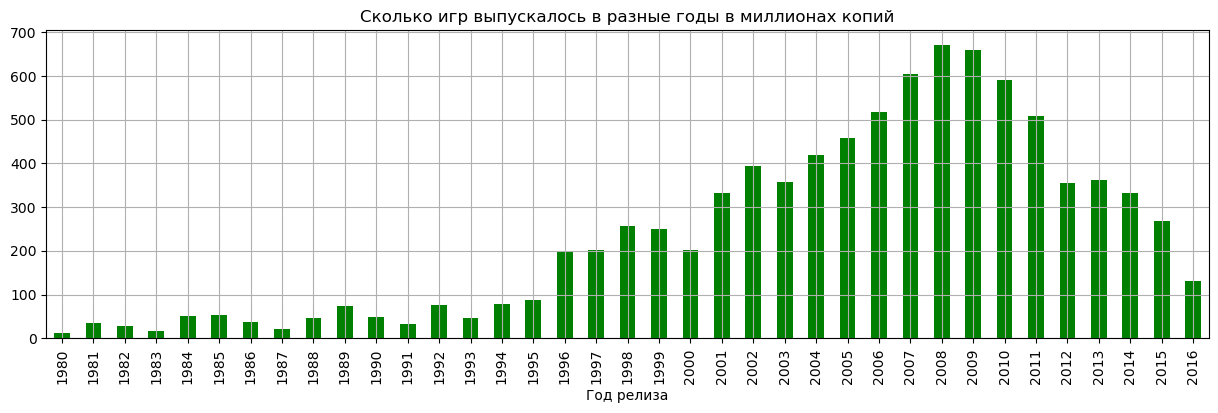

In [17]:
data_games_year.plot(kind='bar', 
                     x='Год релиза', 
                     y='Миллионы проданных копий', 
                     title='Сколько игр выпускалось в разные годы в миллионах копий',
                     grid=True,
                     figsize=(15,4),
                     legend=False,
                     color='green'
                     );

In [18]:
data_games_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
data_games_year.columns = ['Год релиза', 'Количество игр']
data_games_year.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
Год релиза,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Количество игр,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,653,544,581,606,502


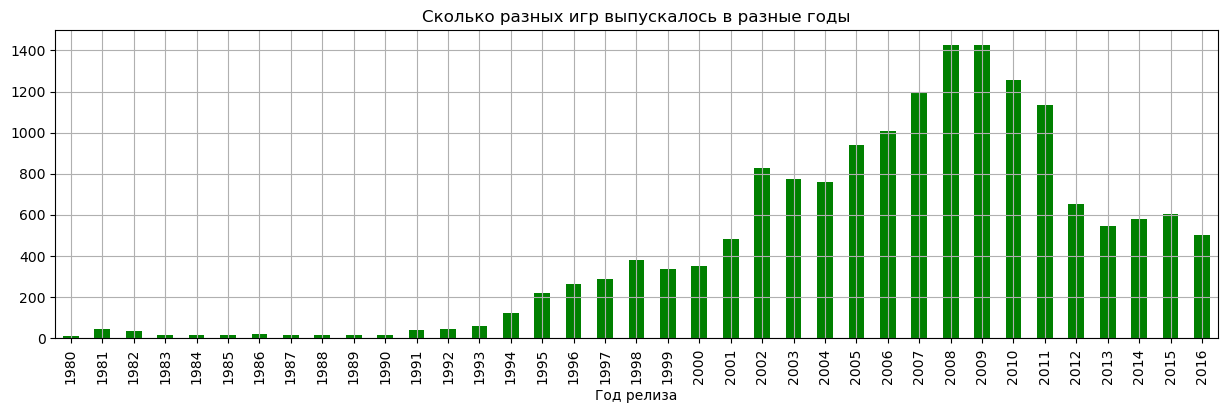

In [19]:
data_games_year.plot(kind='bar', 
                     x='Год релиза', 
                     y='Количество игр', 
                     title='Сколько разных игр выпускалось в разные годы',
                     grid=True,
                     figsize=(15,4),
                     legend=False,
                     color='green'
                     );

Пик активности как по проданным играм, так и по количеству разных игр приходится на 2008 - 2009 года.

Как можно увидеть - игры, выпущенные ранее 2000 года можно вообще не рассматривать.


## 3.2. Как менялись продажи по платформам

In [20]:
data_platform = data.query('year_of_release > 2000').pivot_table(index='platform', values='sum_sales', aggfunc='sum') \
                    .sort_values(by='sum_sales',ascending=False).reset_index()
data_platform.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
platform,ps2,x360,ps3,wii,ds,ps4,gba,psp,3ds,xb,pc,gc,xone,wiiu,psv,ps,gb,n64,dc,ws
sum_sales,1194.39,961.24,931.34,891.18,802.76,314.14,312.81,289.53,257.81,250.58,201.06,196.73,159.32,82.19,53.81,44.33,9.24,3.33,1.42,0.28


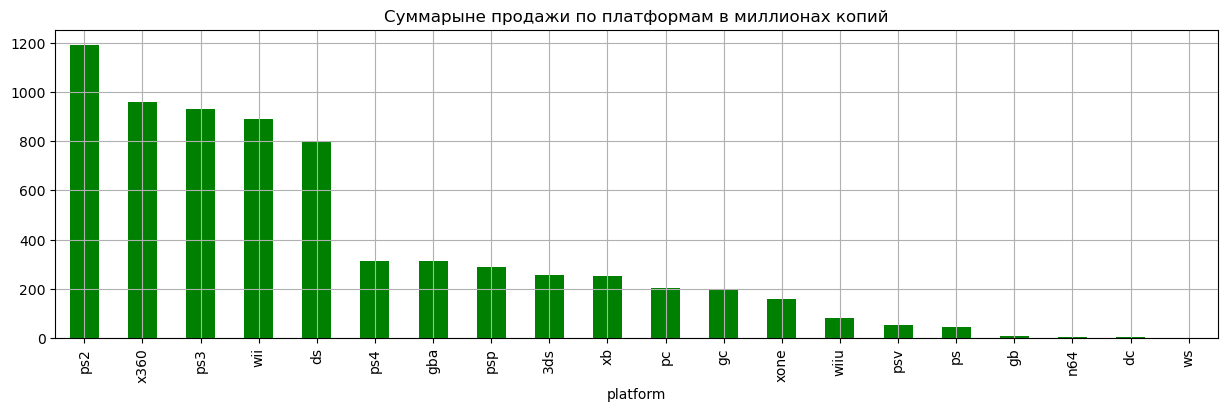

In [21]:
data_platform.plot(kind='bar', 
                     x='platform', 
                     y='sum_sales', 
                     title='Суммарыне продажи по платформам в миллионах копий',
                     grid=True,
                     figsize=(15,4),
                     legend=False,
                     color='green'
                     );

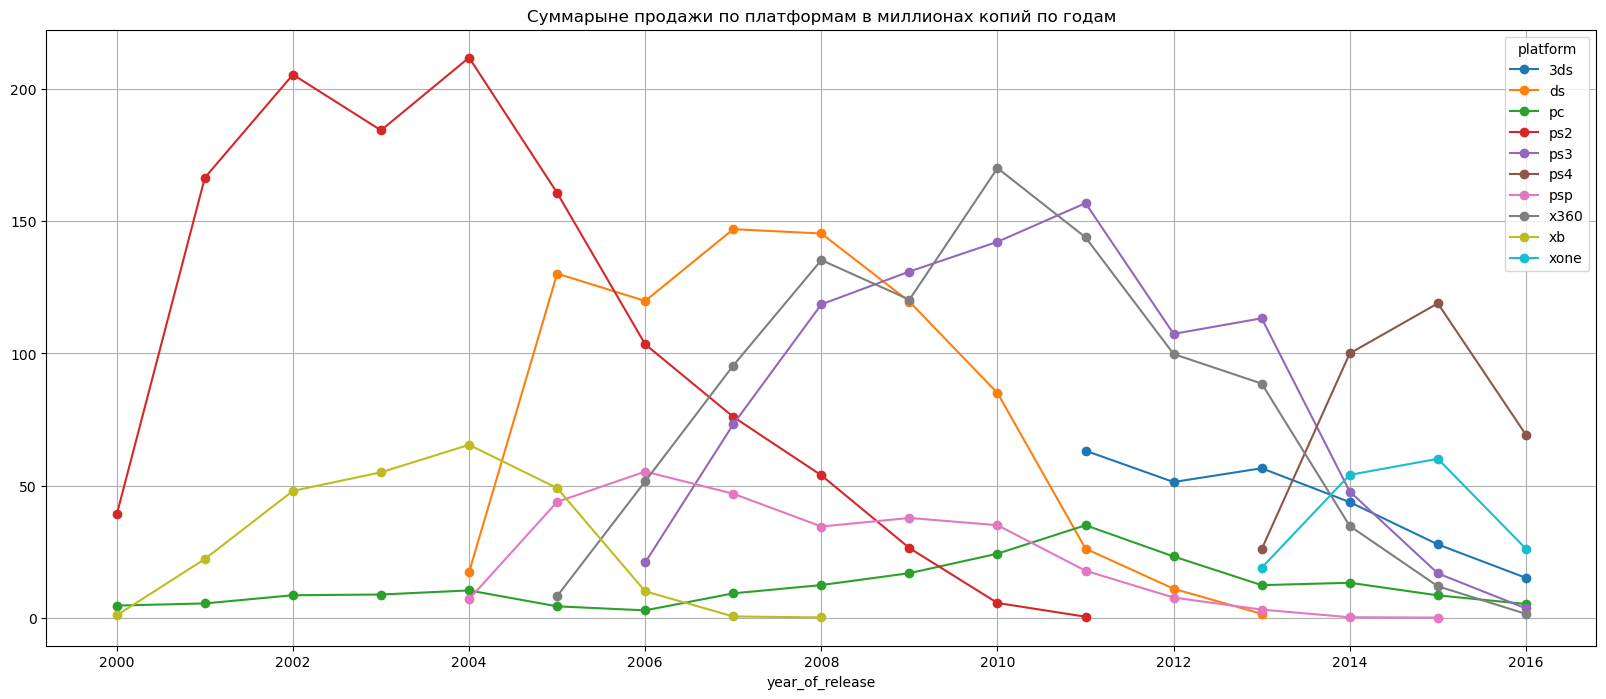

In [22]:
lst = ['ps2','x360','ps3','ds', 'ps4', 'gda', 'psp', '3ds', 'xb', 'pc', 'xone']
data.query('year_of_release >= 2000 and platform in @lst') \
                .pivot_table(index= 'platform', columns='year_of_release', values='sum_sales', aggfunc='sum').T \
                .plot(grid=True,
                     figsize=(20,8),
                     style='o-',
                      title='Суммарыне продажи по платформам в миллионах копий по годам',
                    );

Как видно на графике, платформы живут по 10 лет.

Нет смысла смотреть данные по уже выбывшим платформам с рынка, так как шанс на их возвращение очень мал.

Актуально взять данные с 2013 года: вышла новые платформа ps4 и xone и начали набирать обороты, а топы предыдущих годов в период с 2013 по 2016 еще актуальны.

In [23]:
del data_platform
del data_games_year

**Данные за соответствующий актуальный период**

In [24]:
lst = ['psp', 'ds']    # не актуальные платформы так же сразу отсеял
data_13_16 = data.query('year_of_release >= 2013 and platform not in @lst').copy()

## 3.3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

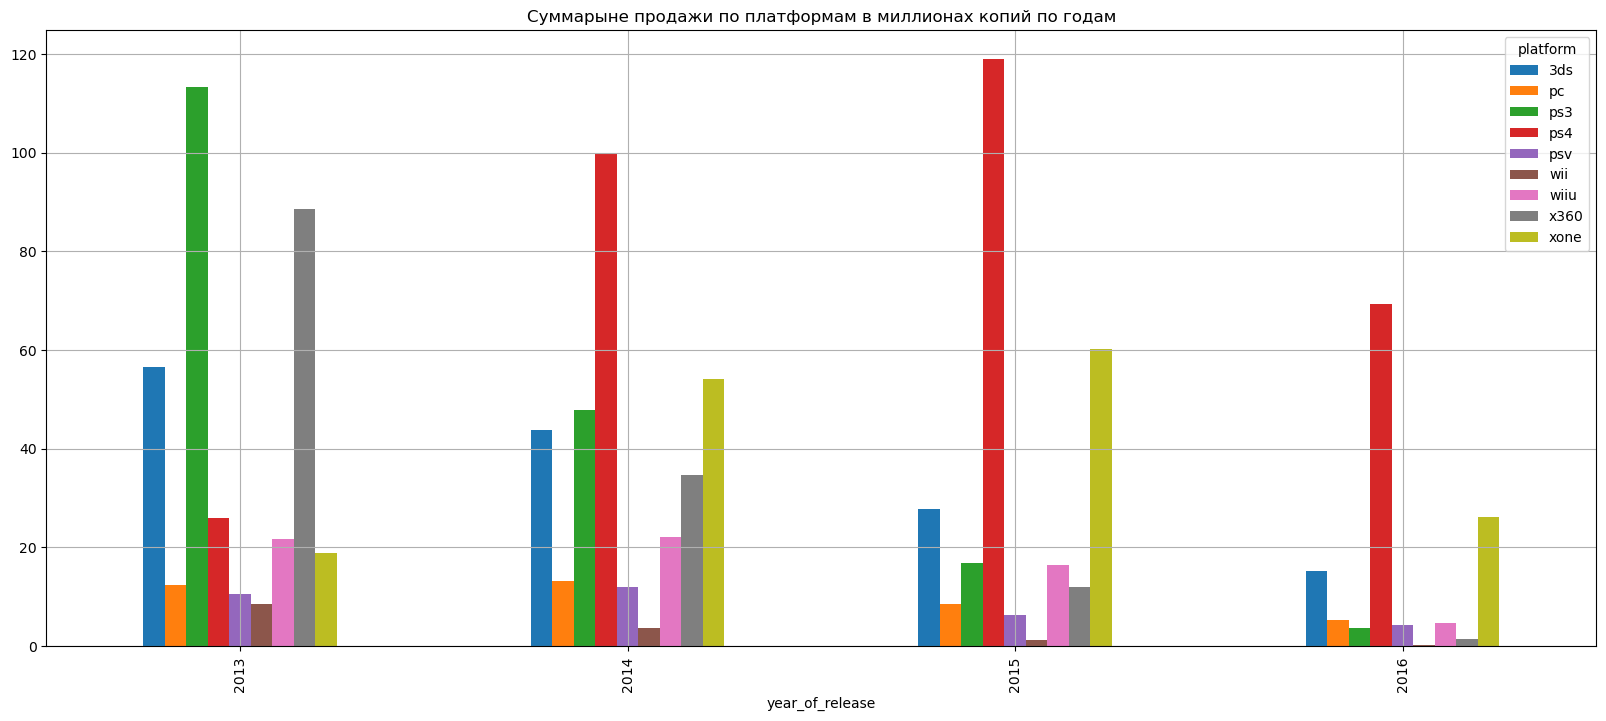

In [25]:
data_13_16.pivot_table(index= 'platform', columns='year_of_release', values='sum_sales', aggfunc='sum')\
.T.plot(kind='bar',grid=True,figsize=(20,8),style='o-',
                      title='Суммарыне продажи по платформам в миллионах копий по годам');

С 2013 года набирают обороты две платформы: `ps4`- лидирует и `xone` на втором месте

Так данные за 2016 год не полные, время жизни платформы примерно 10 лет, то нет оснований пологать, что в 2016 году прошел спад по ним, а следовательно эти две платформы довольно перспективные.

Стоит заметить, что платформа `pc` c небольшим количеством проданных игр за период с 2000 по 2016 года (на графиках ранее) стабильно держит свою планку c небольшими изменениями. 

У остальных платформ спад популярности.

## 3.4. График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

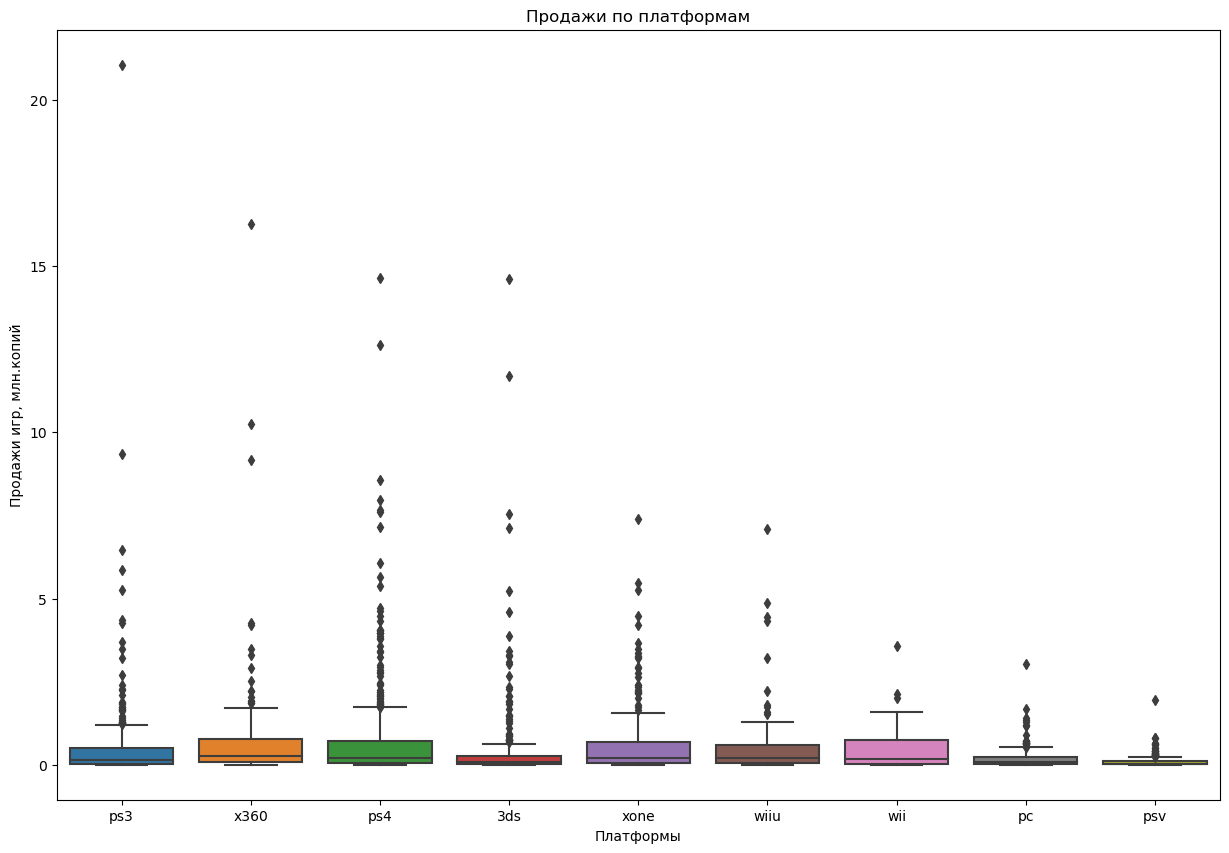

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_13_16, x='platform', y='sum_sales').\
    set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн.копий')
plt.show()

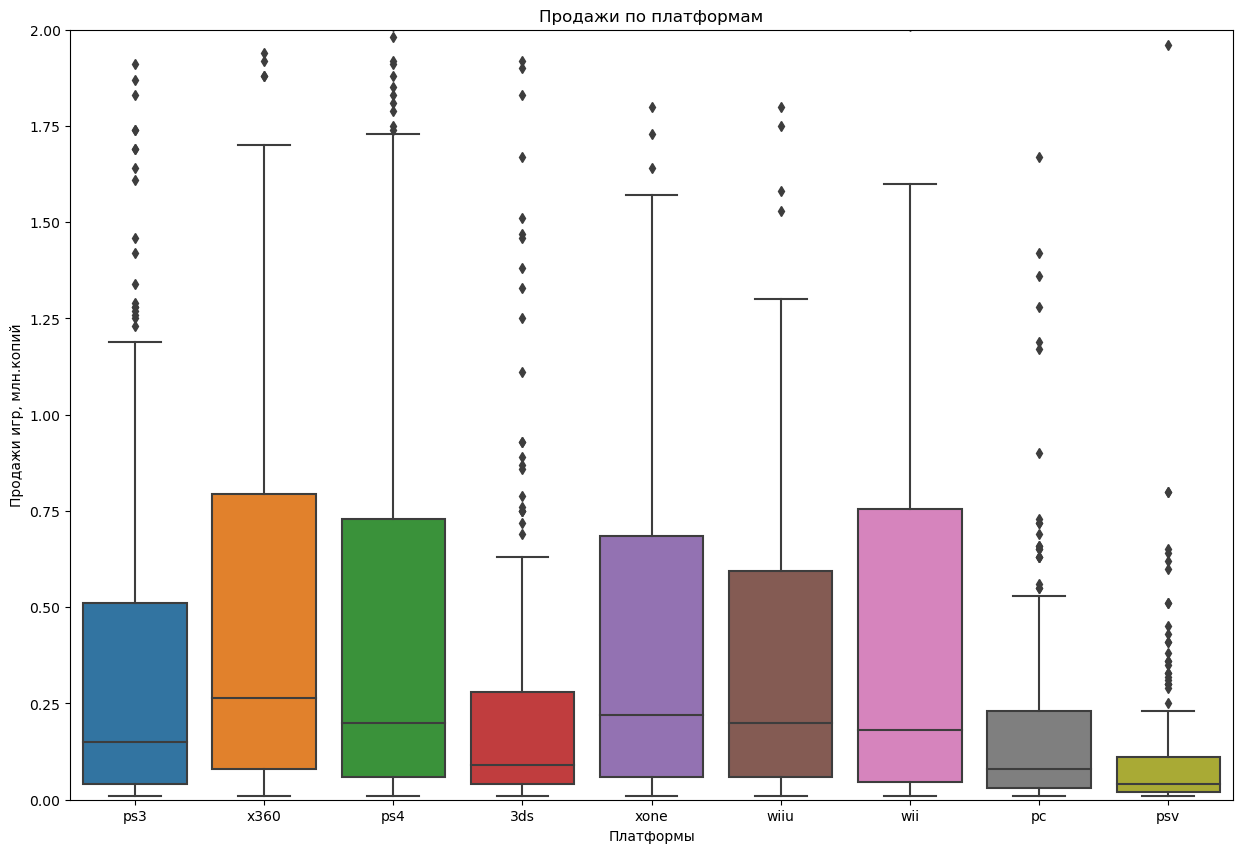

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_13_16, x='platform', y='sum_sales').\
    set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн.копий', ylim=(0,2))
plt.show()

- В данных присутствуют выбросы.
- Наиболее популярные платформы x360, ps4, xone и wii.
- Наимение популярные - psv и pc.
- Медианные значения ps4 и xone приблизительно равны.

## 3.5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

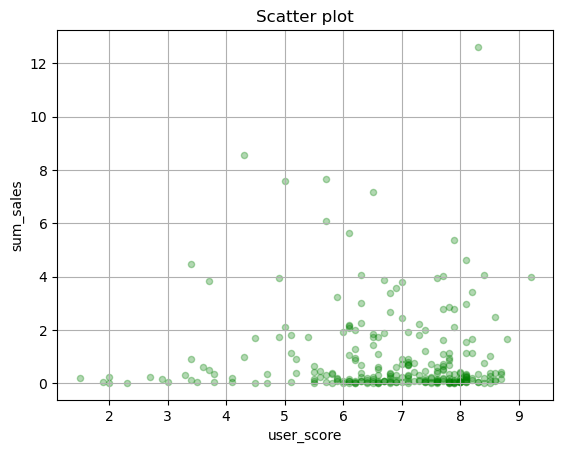

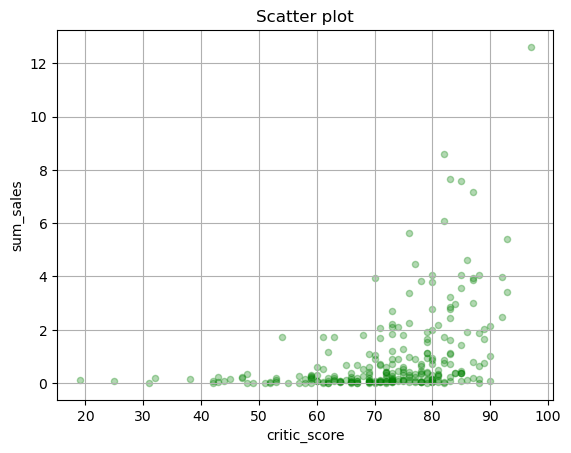

In [28]:
data_ps4 = data_13_16.query('platform == "ps4"')
data_ps4.plot(kind='scatter', y='sum_sales', x='user_score', title='Scatter plot', alpha=0.3, grid=True, color='green');
data_ps4.plot(kind='scatter', y='sum_sales', x='critic_score', title='Scatter plot', alpha=0.3, grid=True, color='green');

In [29]:
data_ps4[['sum_sales', 'critic_score', 'user_score']].corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


- Отзывы пользователей на продажи игр на  платформе ps4 не влияют.
- Отзывы критиков имеют слабое положительное влияние на продажи игр на платформе ps4.

In [30]:
for plat in data_13_16.platform.unique().tolist():
    print(plat)
    df = data_13_16[data_13_16['platform'] == plat]
    print(f'sum_sales and critic_score {df.sum_sales.corr(df.critic_score)}')
    print(f'sum_sales and user_score {df.sum_sales.corr(df.user_score)}')
    print()
    
#    print(data_13_16[data_13_16['platform'] == plat][['sum_sales', 'critic_score', 'user_score']].corr())
#    print()

ps3
sum_sales and critic_score 0.3342853393371919
sum_sales and user_score 0.0023944027357566907

x360
sum_sales and critic_score 0.3503445460228664
sum_sales and user_score -0.011742185147181351

ps4
sum_sales and critic_score 0.4065679020617816
sum_sales and user_score -0.03195711020455643

3ds
sum_sales and critic_score 0.35705661422881035
sum_sales and user_score 0.24150411773563016

xone
sum_sales and critic_score 0.41699832800840164
sum_sales and user_score -0.06892505328279415

wiiu
sum_sales and critic_score 0.3764149065423912
sum_sales and user_score 0.4193304819266187

wii
sum_sales and critic_score nan
sum_sales and user_score 0.6829417215362368

pc
sum_sales and critic_score 0.1960302829436937
sum_sales and user_score -0.09384186952476747

psv
sum_sales and critic_score 0.25474235030686565
sum_sales and user_score 0.0009424723319108626



In [31]:
del data_ps4

### Общая картина выглядит следующим образом:
- Взаимосвязь между отзывами пользователей и продажами игр либо отсутствует, либо очень незначительна (0,0 - 0,4)
- Взаимосвязь между отзывами критикови продажами игр слабо-положительная (0,2-0,4)

Как и в любом правиле есть исключения, так и тут.  На платфомре `wii`  отсутствует оценка критиков, а так же наблюдается ощутимая положитьельная взаимосвязь отзывов пользователей и продажи игр (0,68)

## 3.6. Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

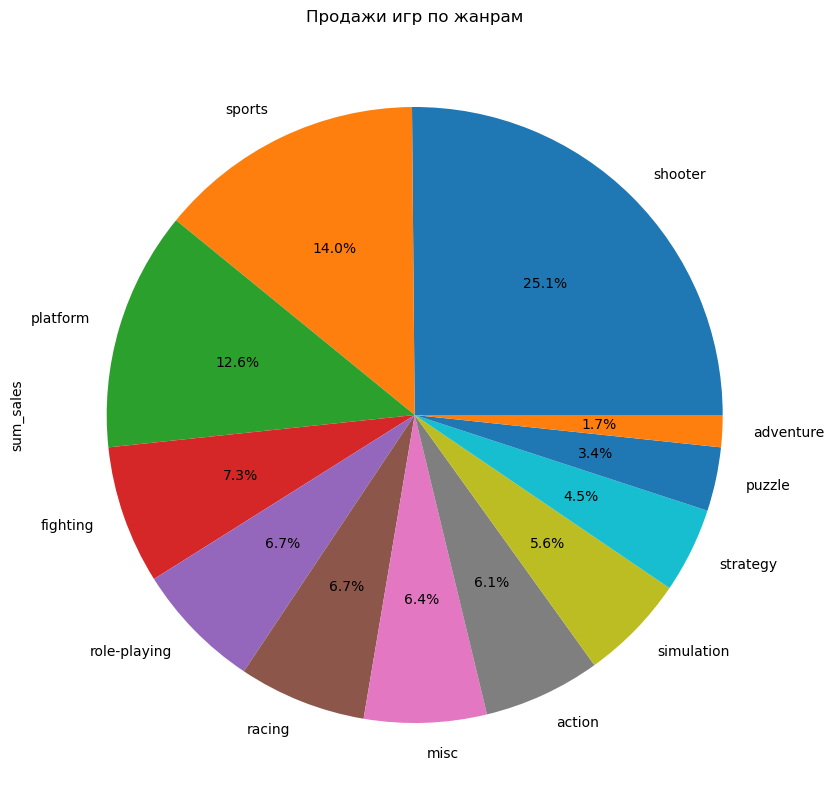

In [32]:
data_13_16.groupby('genre')['sum_sales'].median().sort_values(ascending=False)\
.plot(kind='pie', figsize=(10,10), title='Продажи игр по жанрам', autopct='%1.1f%%');

- Перспективным и очень популярным направлением явлается жанр **shooter** - примерно 25% рынка.

- Еще 26% от всех продаж поделили между собой жанры **sports** и **platform**. Нельзя оставлять их без внимания.
- Что точно не востребовано, дак это жанры **adventure** и **puzzle**. 

# 4. Портрет пользователя каждого региона

## 4.1. Самые популярные платформы (топ-5) каждого региона (NA, EU, JP)

In [33]:
data_platform_region = data_13_16[['platform','na_sales', 'eu_sales', 'jp_sales']].groupby('platform').sum()
data_platform_region

,na_sales,eu_sales,jp_sales
platform,,,
3ds,38.20,30.96,67.81
pc,11.11,25.36,0.00
ps3,63.50,67.81,23.35
ps4,108.74,141.09,15.96
psv,5.04,6.10,18.59
wii,6.56,5.93,0.05
wiiu,29.21,19.85,10.88
x360,81.66,42.52,0.51
xone,93.12,51.59,0.34


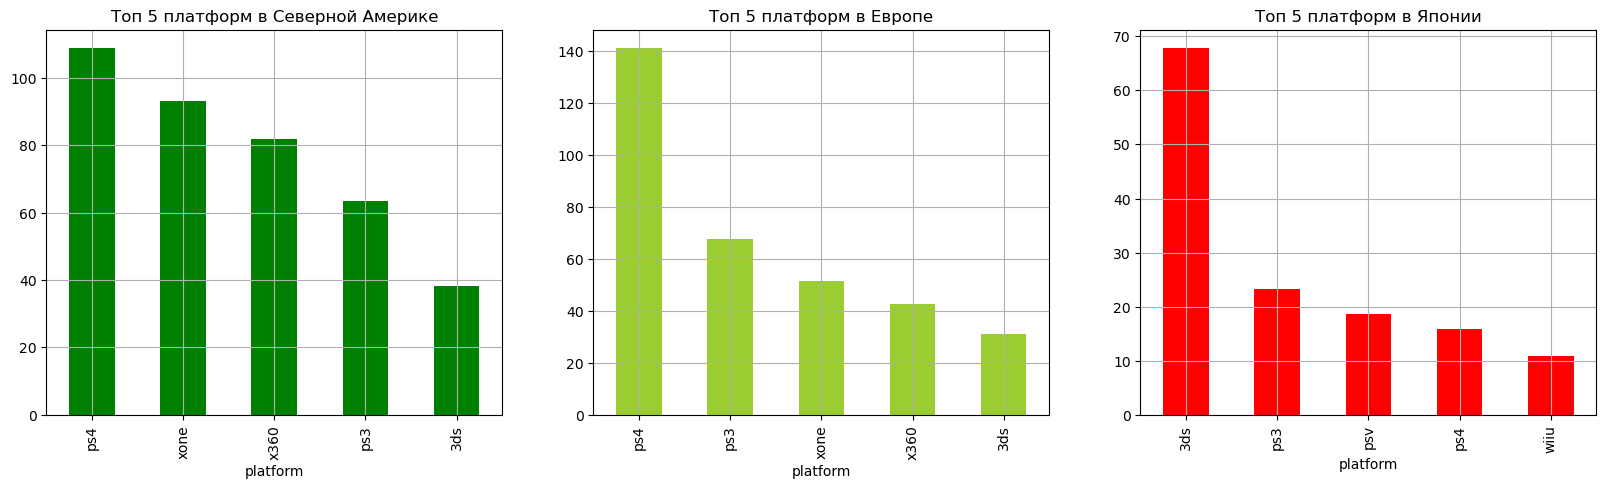

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

data_platform_region.na_sales.sort_values(ascending=False).head()\
                    .plot(kind='bar', ax=ax1, title='Топ 5 платформ в Северной Америке', grid=True, color='green');
data_platform_region.eu_sales.sort_values(ascending=False).head()\
                    .plot(kind='bar', ax=ax2, title='Топ 5 платформ в Европе', grid=True, color='yellowgreen');
data_platform_region.jp_sales.sort_values(ascending=False).head()\
                    .plot(kind='bar', ax=ax3, title='Топ 5 платформ в Японии', grid=True, color='red');

- В Северной Америке и в Европе обожают **ps4**: 110 и 140 млн. продаж соответственно, но недолюбливают такую платформу, как **3ds** (особенно в Европе) 40 и 30 млн. продаж соответственно.
- А вот в Японии наоборот **3ds** лидирует с почти 70 млн. продаж, а **ps4** в отстающих.

Одно ясно точно: рынок Японии противоположен рынку игр Северной Америке и Европе.

- По Северной Америке и Европе **xone** суммарно занимает второе место, а в Японии о ней "вообще не слышали".
- Старички **x360** и **ps3** в Северной Америке и Европе до сих пор были в тренде, но график `суммарых продаж по платформам в миллионах копий` из пункта 3.2. показывает, что не стоит тратить на них ресурсы.

## 4.2. Самые популярные жанры (топ-5)  каждого региона (NA, EU, JP)

In [35]:
data_genre_region = data_13_16[['genre','na_sales', 'eu_sales', 'jp_sales']].groupby('genre').sum()
data_genre_region

,na_sales,eu_sales,jp_sales
genre,,,
action,125.83,117.87,39.65
adventure,7.14,8.22,5.11
fighting,15.55,8.55,7.63
misc,27.46,20.00,9.03
platform,17.93,15.15,4.79
puzzle,0.83,1.00,1.18
racing,12.96,20.19,2.30
role-playing,46.40,36.97,50.01
shooter,109.74,87.86,6.61


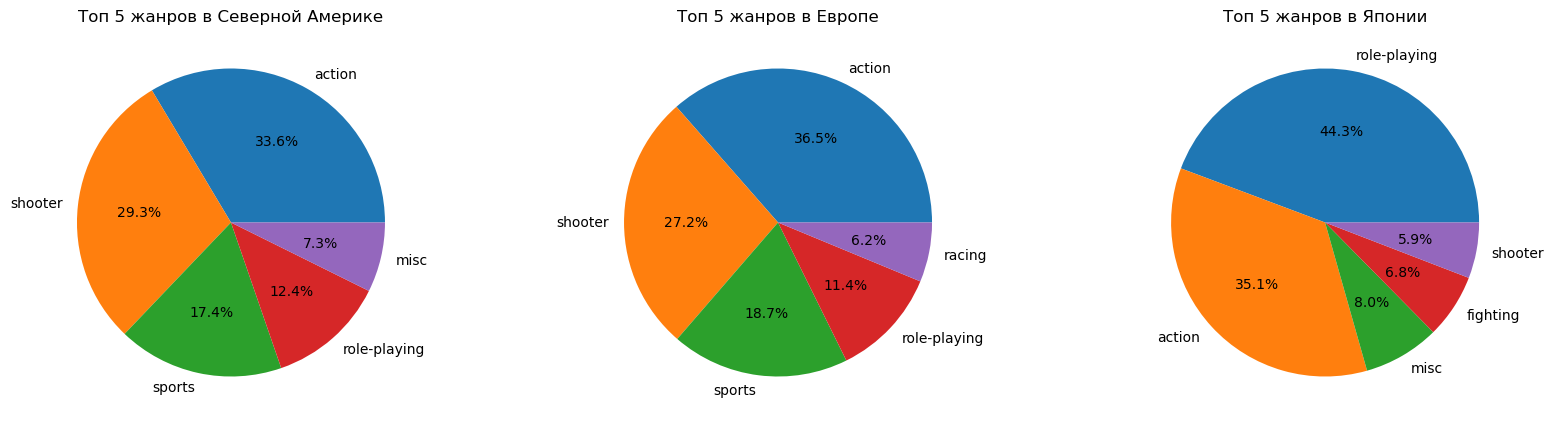

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

data_genre_region.na_sales.sort_values(ascending=False).head()\
                    .plot(kind='pie', ax=ax1, title='Топ 5 жанров в Северной Америке',label="", autopct='%1.1f%%');
data_genre_region.eu_sales.sort_values(ascending=False).head()\
                    .plot(kind='pie', ax=ax2, title='Топ 5 жанров в Европе', label="", autopct='%1.1f%%');
data_genre_region.jp_sales.sort_values(ascending=False).head()\
                    .plot(kind='pie', ax=ax3, title='Топ 5 жанров в Японии', label="", autopct='%1.1f%%');

- Популярные жанры в Северной Америке и Европе в порядке убывания: `action, shooter, sports`.
- В Японии же самым популярным жанром является `role-playuing`, а затем уже `action`.

## 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [37]:
data_rating_region = data_13_16[['rating','na_sales', 'eu_sales', 'jp_sales']].groupby('rating').sum()
data_rating_region

,na_sales,eu_sales,jp_sales
rating,,,
e,78.94,82.80,15.00
e10+,54.02,42.53,5.89
m,165.21,145.32,14.11
t,49.79,41.95,20.44
unknown,89.18,78.61,82.05


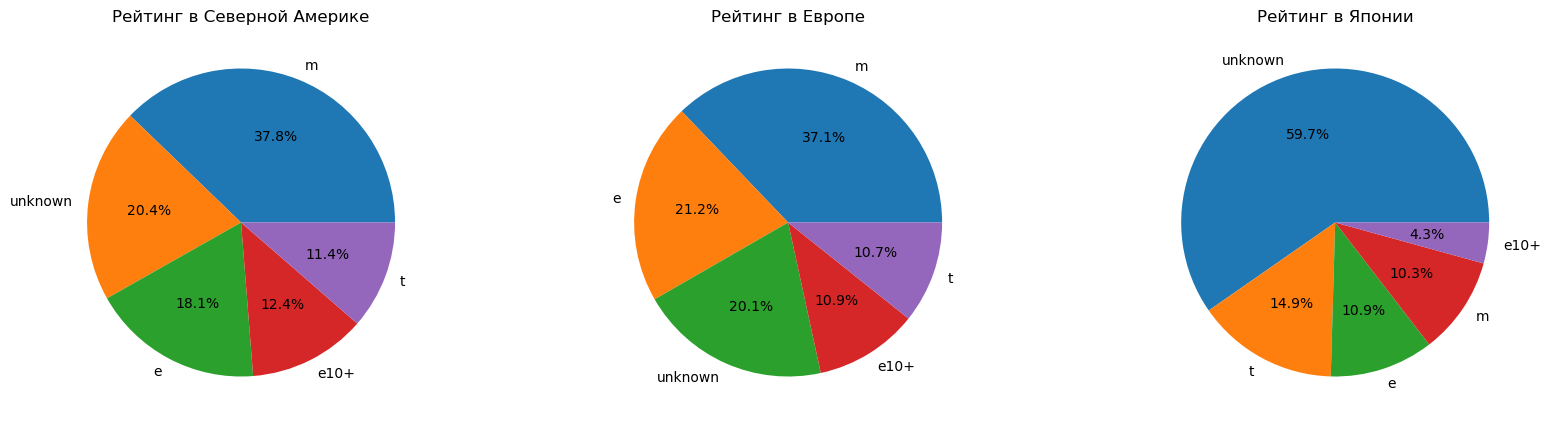

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

data_rating_region.na_sales.sort_values(ascending=False)\
                    .plot(kind='pie', ax=ax1, title='Рейтинг в Северной Америке',label="", autopct='%1.1f%%');
data_rating_region.eu_sales.sort_values(ascending=False)\
                    .plot(kind='pie', ax=ax2, title='Рейтинг в Европе', label="", autopct='%1.1f%%');
data_rating_region.jp_sales.sort_values(ascending=False)\
                    .plot(kind='pie', ax=ax3, title='Рейтинг в Японии', label="", autopct='%1.1f%%');

И опять перед глазами два разынх рынка. Рынок Японии и Европы с Северной Америкой.

Рынок Японии:
- Больше половины (60%) игр без рейтинга (возможно они выпускаются японцами для японцев?)
- 15% игры для подростков, 10% для взрослых, 10% для всех возрастов и 5% для старше 10 лет.

Рынок Европы и Северной Америки.
- В три раза меньше игр без рейтинга, чем у Японии - 20%.
- Популяры игры для взрослых: почти 40%.
- 18-20% для всех на фоне 10-12% для детей, старше 10 лет и 11% у подростков.

Отсутствие рейтинга в 60% у Японии портит всю картину, здесь можно только предположить, что игры для взрослых лидируют так же, как и в Европе и Северной Америке.

In [39]:
del data_rating_region
del data_genre_region
del data_platform_region

### Обобщающий вывод:

Есть два рынка сбыта
- Япония. Преобладает платформа **3ds***, а **ps4*** набирает обороты. Любимый жанр **role-playuing**, но не прочь поиграть и в **action**. Предположительно, любят игры для взрослых.
- Европа и Северная Америка. Любые платформы **ps4** и **xone**. Однако не забывают про теряющих актуальность **ps3** и **x360**. Жанры любимые **action** и **shooter**. Большой объем игр для взрослых.



## 5. Гипотезы

## 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [40]:
data_13_16.query("platform =='xone' and user_score.notna()")['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [41]:
data_13_16.query("platform =='pc' and user_score.notna()")['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [42]:
user_score_xone = data_13_16.query("platform =='xone' and user_score.notna()")['user_score'].tolist()
user_score_pc = data_13_16.query("platform =='pc' and user_score.notna()")['user_score'].tolist()

Если у вас достаточно большие и равные по размеру выборки и нет оснований думать, что дисперсии генеральных совокупностей разные, просто сравнивайте средние t-тестом, не указывая параметр equal_var.

In [43]:
alpha = .05 

results = st.ttest_ind(user_score_xone, user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Шанс получить такие или более выраженные различия 14 %, что не дает нам оснований отвергнуть нулевую гипотезу о равенстве средних у пользовательскич рейтинги платформ Xbox One и PC. 

**Следовательно пользователи платформ Xbox One и PC относятся к одной генеральной совокупности игроков.**

## 5.2. Средние пользовательские рейтинги жанров Action  и Sports разные.

**Нулевая гипотеза**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза**: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [44]:
data_13_16.query("genre =='action' and user_score.notna()")['user_score'].describe()

count    388.000000
mean       6.842784
std        1.327847
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [45]:
data_13_16.query("genre =='sports' and user_score.notna()")['user_score'].describe()

count    159.000000
mean       5.249686
std        1.783038
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [46]:
user_score_action = data_13_16.query("genre =='action' and user_score.notna()")['user_score'].tolist()
user_score_sports = data_13_16.query("genre =='sports' and user_score.notna()")['user_score'].tolist()

Если по какой-то причине выборки у вас разного размера или есть сомнения, что дисперсии у совокупностей одинаковые, укажите этот параметр как False, и тест посчитает дисперсии выборок по отдельности.

In [47]:
alpha = .05 

results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.419141451747253e-20
Отвергаем нулевую гипотезу


Шанс получить такие или более выраженные различия очень мал - менее одного процента, что дает нам основание отвергнуть нулевую гипотезу о равенстве средних у пользовательских рейтинги жанров Action  и Sports.

**Следовательно пользователи жанров Action  и Sport не относятся к одной генеральной совокупности игроков.**

# Вывод
- Отсутствие части данных за 2016 год не дает полное право на 100% утверждения каких либо выводов, но не отменяет общей картины.
- Пик игровой индустрии пришелся на 2008-2009 год. Предпосылок для установки новых рекордов в продаже игр в данный момент не наблюдается, наоборот, можно судить о застое. А это значит игоки изголодались по новым бестселлерам в играх.
- Актуальные данные: выбран период исследования за 2013-2016 г.
- Большинство старых платформ к 2016 году ушло в прошлое, примерный срок жизни 10 лет. Однако персональные компьютеры, хоть и занимают очень очень малую долю рынка, сдаваться не собираются.
- Упор следует делать на `Sony PlayStation 4` и `Xbox One`. Они с 2013 года набирают обороты и в 2017 году уже как 5 лет будут на рынке. А если посмотреть на их предшественников ps3 и x360, то как раз на 5 год приходится пик продаж игр по этим платформам.
- Отзывы критиков, а особенно отзывы самих игроков, можно сказать, не влияют на продажи игр. Слишком мала взаимосвязь.
- Перспективным и очень популярным направлением явлается жанр `shooter`. Мене перпсективные, но хорошо покупаемые жанры: `sports` и `platform`.
- Рынки игр Северной Америки и Европы отличаются от рынка Японии. В Японии вопреки общему тренду популярна платформа **3ds**.
- В Северной Америке и Европе популярны action, shooter, sports, а в Японии -  role-playuing, а затем уже action.
- Перспективные пользователи - люди старше 18 лет, но это не точно. Некоторые данные отсутствуют. (а возможно рейтинг ESRB не отражает действительную картину возраста пользователя? Как Вам игра Postal 2? Из ее описания *ВНИМАНИЕ: ИГРА МОЖЕТ СОДЕРЖАТЬ КОНТЕНТ, НЕ ПОДХОДЯЩИЙ ДЛЯ ВСЕХ ВОЗРАСТОВ ИЛИ ДЛЯ ПРОСМОТРА НА РАБОТЕ. Насилие-Для взрослых-Мясо.* Вот то то же, а я в нее еще в школе играл).
- Исходя из статических тестов можно предположить, что пользователи платформ Xbox One и PC - одни и те же люди. Однако игроки в жанре Action возможно не долюбливают жанр Sports и наоборот, на лицо различие в предпочтениях.